<a href="https://colab.research.google.com/github/Akanerd/NaturalLanguangeProcessing-Orbit/blob/main/NLP-Case%201%20dan%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands on NLP_01 and NLP_02

In [ ]:
#Created by NLP SQUAD-OFA
# Orbit Future Academy, 26 Maret 2022


Teman-teman semua, pada hari ini

Skema yang akan kita selesaikan seperti pada gambar di bawah ini.

![title](https://undangmi.com/wp-content/uploads/2022/03/Screen-Shot-2022-03-26-at-23.14.46.png)

1. Data collection
2. Pre-processing
   1. Case Folding
   2. Filtering
   3. Stopword
   4. Stemming
3. Feature Extraction
   1. BoW
   2. TF-IDF
4. Feature Selection
   1. Chi-Square

# Load Dataset



Penjelasan Label 
* 0: sms normal 
* 1: fraud atau penipuan 
* 2: promo


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#English Languange
#Di sini digunakan untuk import library. Library yang digunakan pandas, numpy, matplotlib dan wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Mengambil data menggunakan URL dan disimpan pada variabel df yang merupakan data frame
url = "https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv"
data = pd.read_csv(url)
#df = pd.read_csv("sentimentdata.csv")
data.shape

(1143, 2)

In [ ]:
data

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0
1140,Mba mau kirim 300 ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0


Total Jumlah SMS: 1143 data

terdiri dari (label):
-- [0] SMS Normal	: 569 data
-- [1] Fraud / Penipuan	: 335 data
-- [2] Promo		: 239 data



([<matplotlib.axis.XTick at 0x11fd04e10>,
 <a list of 3 Text xticklabel objects>)

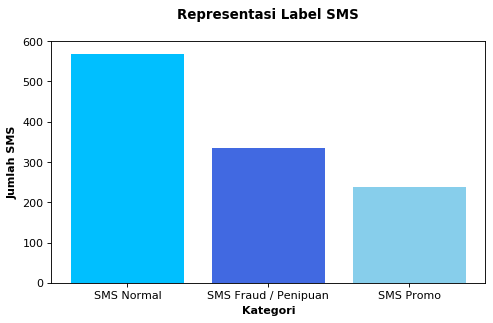

In [ ]:
print('Total Jumlah SMS:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] SMS Normal\t:', data[data.label == 0].shape[0], 'data')
print('-- [1] Fraud / Penipuan\t:', data[data.label == 1].shape[0], 'data')
print('-- [2] Promo\t\t:', data[data.label == 2].shape[0], 'data\n')

height = data['label'].value_counts()
labels = ('SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Representasi Label SMS\n', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah SMS', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)

#plt.savefig('img/representasi label.png') # save plot

## Pre-processing 

Pada kasus ini, kita menggunakan data set berbahasa indonesia, sehingga kita membutuhkan *Library
Sastrawi* untuk menyelesaikan beberapa permasalahan, seperti *stopword dan stemming*


Pastikan Install 

Library Sastrawi

In [ ]:
#!pip install sastrawi

### Membuat Stopword

In [ ]:
#Deklarasi Stopword

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
stopword = stop_factory.create_stop_word_remover()

### Membuat Stemming


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#deklarasi metode stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()


### Normalisasi

Melakukan proses normalisasi teks, misal dari *mrk* menjadi *mereka*

In [ ]:
key_norm = pd.read_csv('data/key_norm.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm["singkat"] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text

### Deklarasi Tokenizer

Tokenizer digunakan untuk memudahkan proses Feature Extraction


In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer =  WordPunctTokenizer()


### Filtering menggunakan RegEx

1. Menghapus angka
2. Menghapus karakter, tanda baca


In [ ]:
import re

filter_1 = r'[^a-zA-Z]' # menghapus angka
filter_2 = r'[^\w\s]' # menghapus karakter tanda baca

In [ ]:
#Fungsi pre-processing
#Membuat fungsi preprocessing untuk menjalankan semua metode di atas

def data_cleaner(text):
    try:
        #Remove Angka dan Karakter
        text = re.sub(filter_1, ' ', text)
        text = re.sub(filter_2, ' ', text)
        lower_case = text.lower()
        #Normalize
        Normalize_handled = text_normalize(lower_case)
        #StopWord
        StopWords_handled  = stopword.remove(Normalize_handled)
        #Stemming
        Stemming_handled   = stemmer.stem(StopWords_handled)
        
        tokens = tokenizer.tokenize(Stemming_handled)
        #return (" ".join(tokens)).strip()
        return(" ".join([x for x in tokens if len(x) > 1])).strip()
    except:
        return 'Error'
    

In [ ]:
#Menjalankan proses pre-processing dan menyimpan hasilnya
x=[]
for hasil in data.teks:
    x.append(data_cleaner(hasil))


In [ ]:
clean_text=pd.DataFrame({'clean_text':x})

data=pd.concat([data,clean_text],axis=1)


In [ ]:
data

,teks,label,clean_text
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash mulai gb my telkomsel a...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,gb hari rupiah ribu spesial buat yang pilih ak...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,pulang hormat sisa kuota flash kb download myt...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,pulang hormat sisa kuota flash kb download myt...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,gb hari rupiah ribu spesial buat yang pilih ak...
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,yooo sama oke saya umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,belum ada nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,0,mbak mau kirim
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,nama beaok bwrangkat pagi mau cas atay tranfer


In [ ]:
#Membagi data x adalah document dan y adalah labelnya
x = data.clean_text
y = data.label


In [ ]:
x

0       promo beli paket flash mulai gb my telkomsel a...
1       gb hari rupiah ribu spesial buat yang pilih ak...
2       pulang hormat sisa kuota flash kb download myt...
3       pulang hormat sisa kuota flash kb download myt...
4       gb hari rupiah ribu spesial buat yang pilih ak...
                              ...                        
1138                 yooo sama oke saya umumin grup kelas
1139           belum ada nulis kerudung kirain warna jins
1140                                       mbak mau kirim
1141       nama beaok bwrangkat pagi mau cas atay tranfer
1142                        nomor bri atas nama kamu mana
Name: clean_text, Length: 1143, dtype: object

# Vectorization - BoW dan proses N-Gram
### Proses mengubah teks menjadi vector menggunakan metode BoW yang sudah dijelaskan sebelumnya

In [ ]:
# Count Vectorization

from sklearn.feature_extraction.text import CountVectorizer

#Unigram
vec = CountVectorizer(ngram_range=(1,1))

#Bigram
#vec = CountVectorizer(ngram_range=(2,2))

vec.fit(x)

CountVectorizer()

In [ ]:
#Melihat Jumlah Fitur
print (len(vec.get_feature_names()))

3181


In [ ]:
#Melihat fitur-fitur apa saja yang ada di dalam corpus kita
print(vec.get_feature_names())

['aa', 'aamiiiin', 'aamiin', 'ab', 'abadi', 'abai', 'abdul', 'abdullah', 'acara', 'account', 'ada', 'adalah', 'adi', 'adik', 'adison', 'admin', 'administrasi', 'adminlte', 'ado', 'adrian', 'adu', 'aduh', 'advertising', 'aesthetic', 'af', 'afr', 'afrika', 'agam', 'agen', 'agenda', 'agendain', 'agenpulsa', 'ags', 'agst', 'agsts', 'agt', 'agua', 'agun', 'agus', 'agust', 'agustus', 'ah', 'ahaha', 'aidzin', 'aigoo', 'air', 'airtravel', 'aiu', 'aja', 'ajaa', 'ajaaa', 'ajak', 'ajakin', 'ajar', 'ajeng', 'akademik', 'akan', 'akang', 'akbar', 'akhir', 'akreditasi', 'akses', 'aksi', 'aktif', 'aktifasi', 'aktivasi', 'aktivitas', 'akucintaislam', 'akumulasi', 'akun', 'akurasi', 'akurat', 'ala', 'alaikum', 'alaiqum', 'alam', 'alamat', 'alami', 'alamsyah', 'alat', 'alesannya', 'algoritma', 'alhamdulillah', 'alhamdullilah', 'alhuda', 'ali', 'aliando', 'all', 'allah', 'alphard', 'alquran', 'alur', 'aman', 'amanda', 'ambil', 'amin', 'amp', 'ampuun', 'an', 'anak', 'ananda', 'and', 'anda', 'andi', 'andika

In [ ]:
#Lihat data tabular 
#Data ini siap untuk dimasukkan dalam proses machine learning

x2 = vec.transform(x).toarray()
data_tabular= pd.DataFrame(x2,columns=vec.get_feature_names())
data_tabular

,aa,aamiiiin,aamiin,ab,abadi,abai,abdul,abdullah,acara,account,...,yudisium,yuk,yuks,yuni,yunit,yusiwa,zalora,zarkasi,zona,zt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_tabular["Label"] = y
data_tabular

,aa,aamiiiin,aamiin,ab,abadi,abai,abdul,abdullah,acara,account,...,yuk,yuks,yuni,yunit,yusiwa,zalora,zarkasi,zona,zt,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Vectorization - TF-IDF dan proses N-Gram
### Proses mengubah teks menjadi vector menggunakan metode TF-IDF yang sudah dijelaskan sebelumnya

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)
x_tf_idf = vec_TF_IDF.transform(x)

In [ ]:
#Melihat Jumlah Fitur
print (len(vec_TF_IDF.get_feature_names()))

3181


In [ ]:
#Melihat fitur-fitur apa saja yang ada di dalam corpus kita
print(vec_TF_IDF.get_feature_names())

['aa', 'aamiiiin', 'aamiin', 'ab', 'abadi', 'abai', 'abdul', 'abdullah', 'acara', 'account', 'ada', 'adalah', 'adi', 'adik', 'adison', 'admin', 'administrasi', 'adminlte', 'ado', 'adrian', 'adu', 'aduh', 'advertising', 'aesthetic', 'af', 'afr', 'afrika', 'agam', 'agen', 'agenda', 'agendain', 'agenpulsa', 'ags', 'agst', 'agsts', 'agt', 'agua', 'agun', 'agus', 'agust', 'agustus', 'ah', 'ahaha', 'aidzin', 'aigoo', 'air', 'airtravel', 'aiu', 'aja', 'ajaa', 'ajaaa', 'ajak', 'ajakin', 'ajar', 'ajeng', 'akademik', 'akan', 'akang', 'akbar', 'akhir', 'akreditasi', 'akses', 'aksi', 'aktif', 'aktifasi', 'aktivasi', 'aktivitas', 'akucintaislam', 'akumulasi', 'akun', 'akurasi', 'akurat', 'ala', 'alaikum', 'alaiqum', 'alam', 'alamat', 'alami', 'alamsyah', 'alat', 'alesannya', 'algoritma', 'alhamdulillah', 'alhamdullilah', 'alhuda', 'ali', 'aliando', 'all', 'allah', 'alphard', 'alquran', 'alur', 'aman', 'amanda', 'ambil', 'amin', 'amp', 'ampuun', 'an', 'anak', 'ananda', 'and', 'anda', 'andi', 'andika

In [ ]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

,aa,aamiiiin,aamiin,ab,abadi,abai,abdul,abdullah,acara,account,...,yudisium,yuk,yuks,yuni,yunit,yusiwa,zalora,zarkasi,zona,zt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [ ]:
#Mengubah nilai data tabular tf-idf & y dari dataframe menjdi array agar dapat dijalankan pada proses seleksi fitur
x_train = np.array(data_tabular_tf_idf)
y_train=np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k = 1000) 
X_kbest_features = chi2_features.fit_transform(x_train, y_train) 
  
# Reduced features 
print('Original feature number:', x_train.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 3181
Reduced feature number: 1000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.739537
1,0.404266
2,1.650743
3,1.258208
4,1.254734
...,...
3176,0.546941
3177,1.935944
3178,0.486472
3179,2.763237


In [ ]:
#Menampilkan fitur beserta nilainya
feature =vec_TF_IDF.get_feature_names()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,0.739537,aa
1,0.404266,aamiiiin
2,1.650743,aamiin
3,1.258208,ab
4,1.254734,abadi
...,...,...
3176,0.546941,yusiwa
3177,1.935944,zalora
3178,0.486472,zarkasi
3179,2.763237,zona


In [ ]:
#Mengurutkan fitur terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
915,53.418666,gb
2144,48.528147,pin
999,46.035259,hadiah
1947,45.299510,nomor
2058,43.751431,paket
...,...,...
1672,0.026251,maksimal
594,0.016847,dalam
905,0.013445,ganti
3047,0.013021,via


In [ ]:
#Menampilkan mask pada feature yang diseleksi
#False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask =chi2_features.get_support()
mask

array([False, False,  True, ..., False,  True, False])

In [ ]:
#Menampilkan fitur-fitur
feature

['aa',
 'aamiiiin',
 'aamiin',
 'ab',
 'abadi',
 'abai',
 'abdul',
 'abdullah',
 'acara',
 'account',
 'ada',
 'adalah',
 'adi',
 'adik',
 'adison',
 'admin',
 'administrasi',
 'adminlte',
 'ado',
 'adrian',
 'adu',
 'aduh',
 'advertising',
 'aesthetic',
 'af',
 'afr',
 'afrika',
 'agam',
 'agen',
 'agenda',
 'agendain',
 'agenpulsa',
 'ags',
 'agst',
 'agsts',
 'agt',
 'agua',
 'agun',
 'agus',
 'agust',
 'agustus',
 'ah',
 'ahaha',
 'aidzin',
 'aigoo',
 'air',
 'airtravel',
 'aiu',
 'aja',
 'ajaa',
 'ajaaa',
 'ajak',
 'ajakin',
 'ajar',
 'ajeng',
 'akademik',
 'akan',
 'akang',
 'akbar',
 'akhir',
 'akreditasi',
 'akses',
 'aksi',
 'aktif',
 'aktifasi',
 'aktivasi',
 'aktivitas',
 'akucintaislam',
 'akumulasi',
 'akun',
 'akurasi',
 'akurat',
 'ala',
 'alaikum',
 'alaiqum',
 'alam',
 'alamat',
 'alami',
 'alamsyah',
 'alat',
 'alesannya',
 'algoritma',
 'alhamdulillah',
 'alhamdullilah',
 'alhuda',
 'ali',
 'aliando',
 'all',
 'allah',
 'alphard',
 'alquran',
 'alur',
 'aman',
 'aman

In [ ]:
#Menampilkan fitur-fitur terpilih berdasarkan nilai mask atau nila tertinggi yang sudah ditetapkan pada Chi-Square
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['aamiin',
 'ab',
 'abadi',
 'ada',
 'adu',
 'afr',
 'agam',
 'agen',
 'ags',
 'agst',
 'agt',
 'agun',
 'aiu',
 'ajak',
 'akhir',
 'akses',
 'aktif',
 'aktivasi',
 'alam',
 'alamsyah',
 'ali',
 'aliando',
 'all',
 'aman',
 'amanda',
 'amp',
 'anda',
 'andika',
 'andromax',
 'angga',
 'angka',
 'angpao',
 'angpaopoinsenyum',
 'angsur',
 'ap',
 'apa',
 'api',
 'aplikasi',
 'app',
 'apps',
 'argo',
 'armada',
 'artha',
 'artis',
 'arya',
 'as',
 'asal',
 'asia',
 'asli',
 'ass',
 'assalamualaikum',
 'at',
 'ato',
 'aug',
 'avanza',
 'axiata',
 'axis',
 'axisnet',
 'ayah',
 'ayam',
 'ayo',
 'ayu',
 'bagai',
 'bagaimana',
 'baik',
 'bakal',
 'bakar',
 'bakmi',
 'balas',
 'ball',
 'bandung',
 'bang',
 'banget',
 'bank',
 'bankbni',
 'banting',
 'banyak',
 'bapa',
 'bapak',
 'baskin',
 'batas',
 'batin',
 'bawa',
 'bayar',
 'bb',
 'bbm',
 'bebek',
 'beberapa',
 'beda',
 'begitu',
 'belanja',
 'beli',
 'beliau',
 'belikan',
 'belum',
 'bentar',
 'berangkat',
 'berapa',
 'beres',
 'berkah',
 '

In [ ]:
#Menampilkan Fitur-fitur yang sudah diseleksi 
#beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses Machine learning

#Hanya 10 fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,aamiin,ab,abadi,ada,adu,afr,agam,agen,ags,agst,...,yellow,ymail,yogya,your,ypac,ytg,yuk,yunit,zalora,zona
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.245038,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelling (Machine Learning)

In [ ]:
#Coming Soon

# Evaluation

In [ ]:
#Coming Soon

# Deployment

In [ ]:
#Coming Soon

# BASIC WORD CLOUD 

### SMS Normal

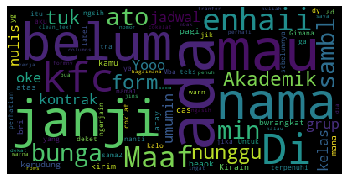

In [ ]:
#Import Library Word cloud
#Word cloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul

sms_normal = data[data.label == 0]
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(sms_normal))

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

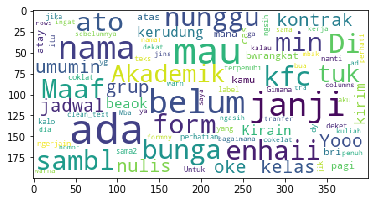

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(sms_normal))
plt.figure()
plt.imshow(wordcloud)
plt.axis("on")
plt.show()

### SMS Fraud/SPAM

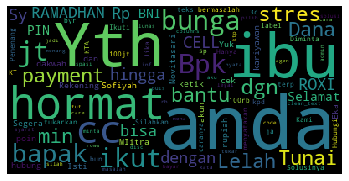

In [ ]:
# Create and generate a word cloud image:
sms_fraud =  data[data.label == 1]
wordcloud = WordCloud().generate(str(sms_fraud))

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

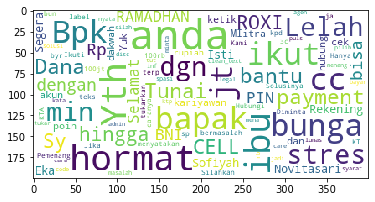

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(sms_fraud))
plt.figure()
plt.imshow(wordcloud)
plt.axis("on")
plt.show()

### SMS Promo

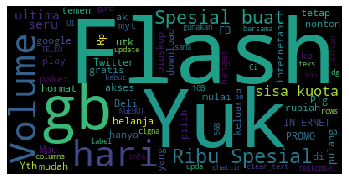

In [ ]:
# Create and generate a word cloud image:
sms_promo =  data[data.label == 2]
wordcloud = WordCloud().generate(str(sms_promo))

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

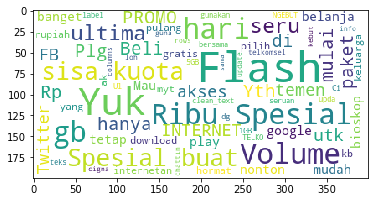

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(sms_promo))
plt.figure()
plt.imshow(wordcloud)
plt.axis("on")
plt.show()

# Costumized WORD CLOUD 

### Word Cloud untuk SMS Normal

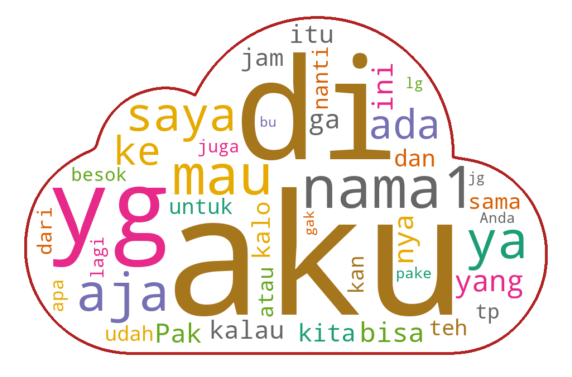

In [ ]:
import cv2

originalImage = cv2.imread('img/cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

# WordCloud Label SMS Normal
sms_normal = data[data.label == 0]
normal_string = []
for t in sms_normal.teks:
    normal_string.append(t)
normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=300, min_font_size=25,
                      mask=cloud_mask, contour_width=5, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word Cloud untuk SMS Fraud /SPAM

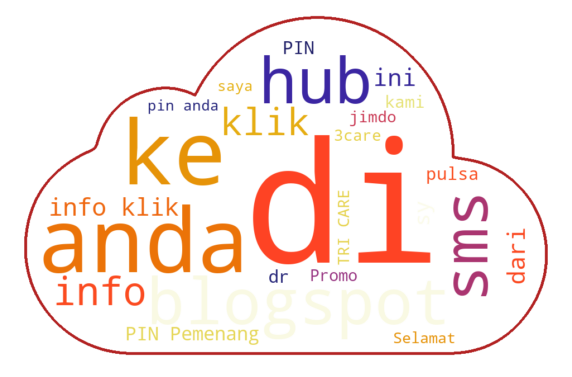

In [ ]:
# WordCloud Label SMS Fraud / Penipuan
sms_fraud = data[data.label == 1]
fraud_string = []
for t in sms_fraud.teks:
    fraud_string.append(t)
fraud_string = pd.Series(fraud_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='CMRmap',
                      max_font_size=300, min_font_size=25,
                      mask=cloud_mask, contour_width=5, contour_color='firebrick',
                      max_words=100).generate(fraud_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word Cloud untuk SMS Promo

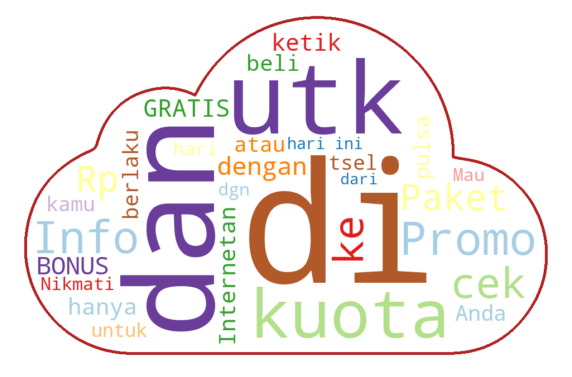

In [ ]:
# WordCloud Label SMS Promo
sms_promo = data[data.label == 2]
promo_string = []
for t in sms_promo.teks:
    promo_string.append(t)
promo_string = pd.Series(promo_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Paired',
                      max_font_size=300, min_font_size=25,
                      mask=cloud_mask, contour_width=5, contour_color='firebrick',
                      max_words=100).generate(promo_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Student Activity (FGD 1 jam + Group Task ( 1 April 2022 )  )

# Student Activity
Lakukan proses di atas menggunakan dataset https://www.kaggle.com/datasets/grikomsn/lazada-indonesian-reviews

Tugas anda: Tentukan pre-processing yang tepat untuk dataset di atas

Setelah dikerjakan, buatlah resume berdasarkan pengalaman anda dalam melakukan pre-processing dan feature extraction



